In [ ]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

df = pd.read_csv("..\datasets\yfinance_data\AAPL_historical_data.csv")
df.set_index("Date", inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [29]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


moving average trading signal based on the last 100 says , AS A SHORT term traders 


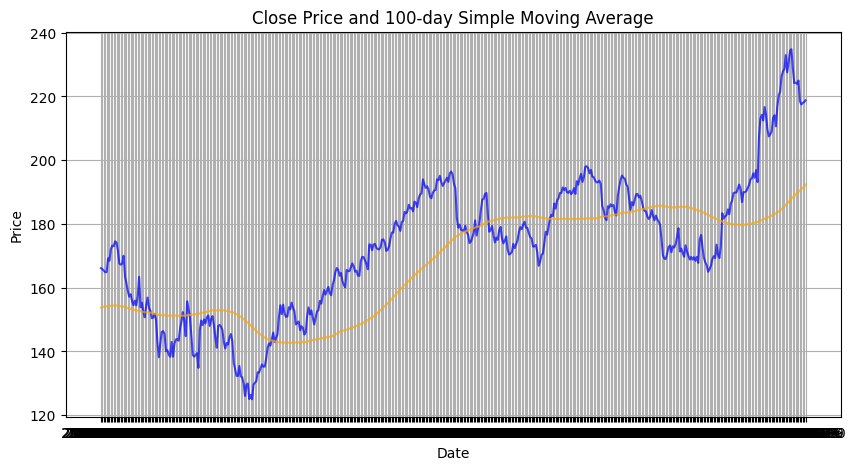

In [50]:
df["SMA_100"] = ta.SMA(df["Close"], timeperiod=100)
# Calculate EMA (Exponential Moving Average)
df["EMA_12"] = ta.EMA(df["Close"], timeperiod=12)
df["EMA_26"] = ta.EMA(df["Close"], timeperiod=26)

plt.figure(figsize=(10, 5))
plt.plot(df["Close"].iloc[-500:], label="Close Price", color="blue", alpha=0.7)
plt.plot(df["SMA_100"].iloc[-500:], label="100-day SMA", color="orange", alpha=0.7)
plt.title("Close Price and 100-day Simple Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")

plt.grid(True)
plt.show()

Relative Strength Index(RSI) of 14 days loos and gain 

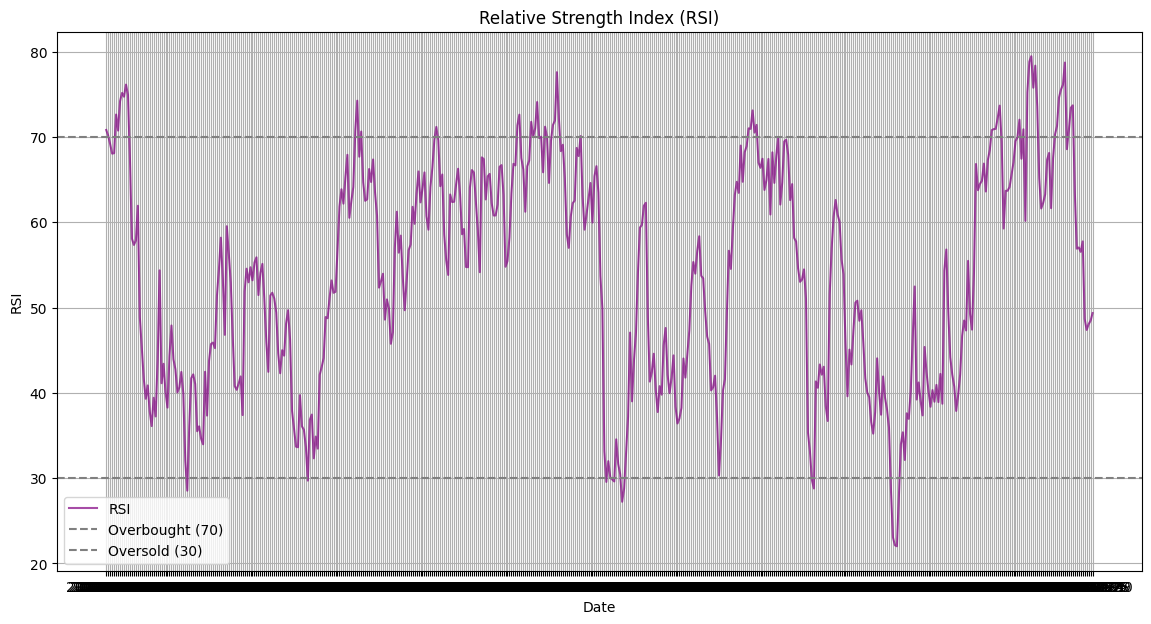

In [56]:
df["RSI"] = ta.RSI(df["Close"], timeperiod=14)
plt.figure(figsize=(14, 7))
plt.plot(df.index[-500:], df["RSI"].iloc[-500:], label="RSI", color="purple", alpha=0.7)
plt.axhline(y=70, color="gray", linestyle="--", label="Overbought (70)")
plt.axhline(y=30, color="gray", linestyle="--", label="Oversold (30)")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()

MDA

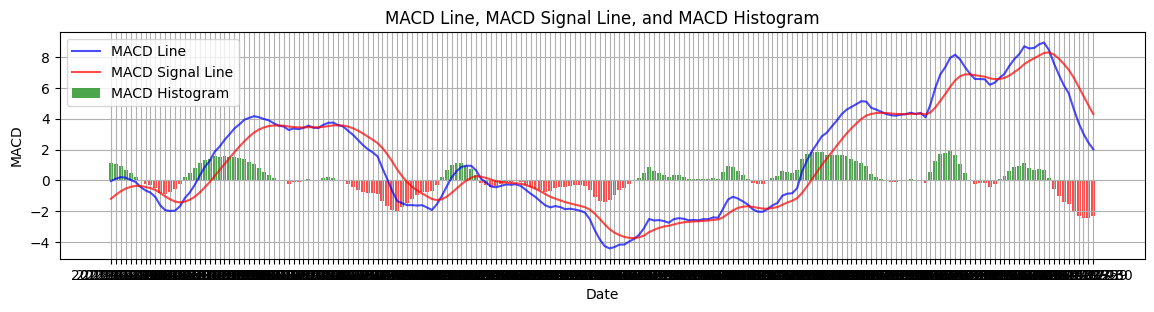

In [60]:
df["MACD_Line"], df["MACD_Signal"], df["MACD_Histogram"] = ta.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

# Plot MACD and MACD Signal
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 3)
plt.plot(df["MACD_Line"].iloc[-200:], label="MACD Line", color="blue", alpha=0.7)
plt.plot(
    df["MACD_Signal"].iloc[-200:], label="MACD Signal Line", color="red", alpha=0.7
)
plt.bar(
    df.iloc[-200:].index,
    df["MACD_Histogram"].iloc[-200:],
    color=["green" if x >= 0 else "red" for x in df["MACD_Histogram"].iloc[-200:]],
    label="MACD Histogram",
    alpha=0.7,
)
plt.title("MACD Line, MACD Signal Line, and MACD Histogram")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.grid(True)